# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Arnold Atchoe.
### GitHub Repository: https://github.com/kwameape123/module7-final_project

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Project Description
This project involves identifying common themes or entities across the news websites listed below and then analysing an article on the most common entities.
1.	https://www.cnn.com/world
2.	https://www.bbc.com/news
3.	https://www.foxnews.com/world


### Project Libraries
Libraries will be install in virtual environment using requirements.txt and pip.

1. beautifulsoup4  # parsing webpages (HTML documents)
2. html5lib              # parsing webpages (HTML documents)  - especially if poorly formatted
3. ipykernel    # for Jupyter notebooks
4. jupyterlab   # for Jupyter notebooks
5. matplotlib           # customizing visualizations
6. requests     # make HTTP requests (a very popular Python package)
7. spacy                   # for NLP 
8. spacytextblob     # for NLP - combines spaCy and TextBlob (simpler interface)

In [34]:
# import needed libraries
from bs4 import BeautifulSoup
import requests
import html5lib
import ipykernel
import jupyterlab
import matplotlib.pyplot as plt
import spacy
import spacytextblob
import pickle
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter



In [ ]:
%pip list

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.0
argon2-cffi               23.1.0
Note: you may need to restart the kernel to use updated packages.argon2-cffi-bindings      21.2.0

arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4


attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      1.3.0
build                     1.2.2.post1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.3.2
click                     8.2.1
cloudpathlib              0.21.1
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.2
cycler                    0.12.1
cymem                     2.0.11
debugpy                   1.8.6
decorator                 5.1.1
defusedxml                0.7.1
et-xmlfile                1.1.0
executing                 2.1.0
fastjsonschema            2.20.0
fonttools                 4.58.1
fqdn                      1.5.1
greenlet                  3.2.2
h11                       0.14.0
html5lib                  1.1
httpcore                  1.0.6
httpx                

### FETCH CONTENTS FROM NEWS WEBSITE TO FILES

In [3]:
# fetch HTML content from multiple news websites
response_1 = requests.get("https://www.cnn.com/world")
response_2 = requests.get("https://www.bbc.com/news/world")
response_3 = requests.get("https://www.foxnews.com/world")

# check if the requests were successful
if response_1.status_code == 200 and response_2.status_code == 200 and response_3.status_code == 200:
    print("Successfully fetched content from all news websites.")
else:print("Failed to fetch content from one or more news websites.")

# check the content type
print("Content type of CNN:", response_1.headers['Content-Type'])
print("Content type of BBC:", response_2.headers['Content-Type'])
print("Content type of Fox News:", response_3.headers['Content-Type'])

# view the first 500 characters of the HTML content
print("First 500 characters of CNN content:", response_1.text[:500])
print("First 500 characters of BBC content:", response_2.text[:500])
print("First 500 characters of Fox News content:", response_3.text[:500])

# save the HTML content to pickle files to avoid re-fetching
import pickle
with open('cnn_content.pkl', 'wb') as file:
    pickle.dump(response_1.text, file)
with open('bbc_content.pkl', 'wb') as file:
    pickle.dump(response_2.text, file)
with open('foxnews_content.pkl', 'wb') as file:
    pickle.dump(response_3.text, file)



Successfully fetched content from all news websites.
Content type of CNN: text/html; charset=utf-8
Content type of BBC: text/html; charset=utf-8
Content type of Fox News: text/html; charset=utf-8
First 500 characters of CNN content:   <!DOCTYPE html>
<html lang="en" data-uri="cms.cnn.com/_pages/cl9wqykfb000026p95p1gfx93@published" data-layout-uri="cms.cnn.com/_layouts/layout-no-rail/instances/world-v1@published" >
  <head>
<link rel="dns-prefetch" href="//tpc.googlesyndication.com">

<link rel="preconnect" href="//tpc.googlesyndication.com">

<link rel="dns-prefetch" href="//pagead2.googlesyndication.com">

<link rel="preconnect" href="//pagead2.googlesyndication.com">

<link rel="dns-prefetch" href="//www.googletagservices
First 500 characters of BBC content: <!DOCTYPE html><html lang="en-GB"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><title>World | Latest News &amp; Updates | BBC News</title><meta name="page.section" content="News"/><meta name="p

### READ AND PARSE CONTENT OF PICKLE FILES

In [7]:
# read contents from the pickle files
with open('cnn_content.pkl', 'rb') as file:
    cnn_content = pickle.load(file)
with open('bbc_content.pkl', 'rb') as file:
    bbc_content = pickle.load(file)
with open('foxnews_content.pkl', 'rb') as file:
    foxnews_content = pickle.load(file)

# parse the HTML content using BeautifulSoup
cnn_soup = BeautifulSoup(cnn_content, 'html5lib')
bbc_soup = BeautifulSoup(bbc_content, 'html5lib')
foxnews_soup = BeautifulSoup(foxnews_content, 'html5lib')

# find headlines 
cnn_headlines = cnn_soup.find_all(class_='container__headline-text')
bbc_headlines = bbc_soup.find_all(attrs={'data-testid':'card-headline'})
foxnews_headlines = foxnews_soup.find_all(class_='title')
# write the headlines to a text file
with open('cnn_headlines.txt', 'w') as file:
    for headline in cnn_headlines:
        file.write(headline.get_text() + '\n')
with open('bbc_headlines.txt', 'w') as file:
    for headline in bbc_headlines:
        file.write(headline.get_text() + '\n')
with open('foxnews_headlines.txt', 'w') as file:
    for headline in foxnews_headlines:
        file.write(headline.get_text() + '\n')



### DETERMINE THE MOST COMMON HEADLINE

In [18]:
# load the English NLP model
nlp = spacy.load("en_core_web_sm")
# extract common headlines among the three news websites from text files
with open('cnn_headlines.txt', 'r') as file:
    cnn_headlines = file.readlines()
with open('bbc_headlines.txt', 'r') as file:
    bbc_headlines = file.readlines()
with open('foxnews_headlines.txt', 'r') as file:
    foxnews_headlines = file.readlines()
# combine all headlines into a single list
all_headlines = cnn_headlines + bbc_headlines + foxnews_headlines
# create a dictionary to count occurrences of each headline
headline_counts = {}
for headline in all_headlines:
    headline = headline.strip()
    if headline in headline_counts:
        headline_counts[headline] += 1
    else:
        headline_counts[headline] = 1
    
# print top ten headlines and find the most common headline
most_common_headline = max(headline_counts, key=headline_counts.get)
print("top ten headline_counts:")
top_ten_headlines = sorted(headline_counts.items(), key=lambda x: x[1], reverse=True)[:10]
for headline, count in top_ten_headlines:
    print(f"{headline}: {count} occurrences")
print()
print("Most common headline:", most_common_headline)

top ten headline_counts:
Russia drops missile deployment moratorium amid tensions with Trump admin: 3 occurrences
UN official says Israel expanding Gaza operations would risk 'catastrophic consequences': 2 occurrences
Despite Trump's peace calls, Russian attacks on Ukraine double since inauguration: 2 occurrences
Texas governor seeks court order to fire top Democrat who fled in row over voting map: 2 occurrences
RFK Jr cancels $500m in funding for mRNA vaccines that counter viruses like Covid: 2 occurrences
Hiroshima marks 80 years since atomic bombing: 2 occurrences
Great Barrier Reef suffers worst coral decline on record: 2 occurrences
Clintons subpoenaed to testify in congressional Epstein investigation: 2 occurrences
Brother of Israeli hostage urges UN to act after video shows Hamas starving and torturing captives: 2 occurrences
Johnson dines with Netanyahu in landmark visit, highest US official to visit disputed West Bank: 2 occurrences

Most common headline: Russia drops missile 

### ANALYZE MOST COMMON HEADLINE

#### STEP 1: FETCH AND STORE ARTICLE IN PICKLE FILE
Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [3]:
# get article content for the most common headline
url = "https://www.foxnews.com/world/russia-drops-missile-deployment-moratorium-amid-tensions-trump-admin"
response = requests.get(url)
if response.status_code == 200:
    print("Successfully fetched content for the most common headline article.")
else:
    print("Failed to fetch content for the most common headline article.")

# store the article content in a pickle file
with open('most_common_headline_article.pkl', 'wb') as file:
    pickle.dump(response.text, file)

Successfully fetched content for the most common headline article.


#### STEP2:SENTIMENT ANALYSIS ON ARTICLE
Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [33]:
# get the article content from the pickle file
with open('most_common_headline_article.pkl', 'rb') as file:
    article_content = pickle.load(file)
# parse the article content using BeautifulSoup
article_soup = BeautifulSoup(article_content, 'html5lib')
# find the article text
article_content = article_soup.find('div', class_='article-body')
if article_content:
    paragraphs = article_content.find_all('p')
    article_text = '\n'.join([para.get_text() for para in paragraphs])
    print(article_text)
else:
    print("Article content not found.")
print()
print()
# perform sentiment analysis on the article text
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")
doc = nlp(article_text)
# determine the sentiment of the article
sentiment = doc._.blob.sentiment
print("Sentiment of the article:")
print(f"Polarity: {sentiment.polarity}")
print()
print()
# determine number of sentences in the article
num_sentences = len([sent for sent in doc.sents])
print(f"Number of sentences in the article: {num_sentences}")

Fox News contributor Dan Hoffman evaluates the latest foreign policy developments on ‘The Story.’
Former Russian President Dmitry Medvedev said that NATO is to blame for Moscow's decision to withdraw from a longstanding moratorium on missile deployment.
Russia's foreign ministry announced earlier this week that it would no longer be bound by the Intermediate-Range Nuclear Forces Treaty. The U.S. had withdrawn from the treaty in 2019, but Russian officials had said they would avoid deploying short- and medium-range nuclear missiles so long as the U.S. did the same.
"The Russian Foreign Ministry's statement on the withdrawal of the moratorium on the deployment of medium- and short-range missiles is the result of NATO countries' anti-Russian policy," Medvedev posted Sunday on X.
"This is a new reality all our opponents will have to reckon with. Expect further steps," he added.
MEDVEDEV WARNS TRUMP'S NEW DEADLINE TO END RUSSIA-UKRAINE CONFLICT IS A ‘STEP TOWARDS WAR’
Russia's Deputy head o

#### STEP 3: TOKENIZATION OF ARTICLE
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [43]:
# determine the most common words in the article by converting the article text to lowercase and removing punctuation
# tokenize the article text
doc = nlp(article_text.lower())
# create a list of words, excluding punctuation
words = [token.text for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
# count the occurrences of each word
word_counts = Counter(words)
# print the most common 5 words
most_common_words = word_counts.most_common(5)
print("Most common words in the article:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")

Most common words in the article:
nuclear: 8 occurrences
russian: 7 occurrences
president: 7 occurrences
medvedev: 7 occurrences
russia: 6 occurrences


#### STEP 4: LEMMATIZATION
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [45]:
# determine the most common base words in the article by converting the article text to lowercase and removing punctuation
# lemmatize the article text
doc = nlp(article_text.lower())
# create a list of base words, excluding punctuation
base_words = [token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
# count the occurrences of each base word
base_word_counts = Counter(base_words)
# print the most common 5 base words
most_common_base_words = base_word_counts.most_common(5)
print("Most common base words in the article:")
for base_word, count in most_common_base_words:
    print(f"{base_word}: {count} occurrences")

Most common base words in the article:
nuclear: 8 occurrences
russian: 7 occurrences
president: 7 occurrences
medvedev: 7 occurrences
missile: 6 occurrences


#### STEP 5: SCORING AND PLOTING SENTENCES USING TOKENS.
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Sentence: fox news contributor dan hoffman evaluates the latest foreign policy developments on ‘the story.’

Tokens: ['fox', 'news', 'contributor', 'dan', 'hoffman', 'evaluates', 'the', 'latest', 'foreign', 'policy', 'developments', 'on', 'the', 'story']
['nuclear', 'russian', 'president', 'medvedev', 'russia']
Number of words in the sentence: 14
Number of most common words in the sentence: 0
Score of the sentence: 0.0

Sentence: former russian president dmitry medvedev said that nato is to blame for moscow's decision to withdraw from a longstanding moratorium on missile deployment.

Tokens: ['former', 'russian', 'president', 'dmitry', 'medvedev', 'said', 'that', 'nato', 'is', 'to', 'blame', 'for', 'moscow', "'s", 'decision', 'to', 'withdraw', 'from', 'a', 'longstanding', 'moratorium', 'on', 'missile', 'deployment']
['nuclear', 'russian', 'president', 'medvedev', 'russia']
Number of words in the sentence: 24
Number of most common words in the sentence: 3
Score of the sentence: 0.12

Se

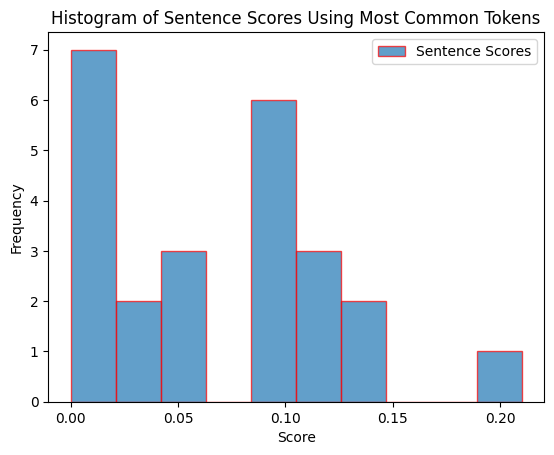

In [67]:
# define a function to score the sentences in the article by the most common tokens
# get only words from most_common_words
most_common_words = [word for word, count in word_counts.most_common(5)]

def score_sentences_by_common_tokens(doc, most_common_words):
    scores = []
    for sent in doc.sents:
        sentence = sent.text
        # print the sentence
        print(f"Sentence: {sentence}")
        # print the tokens in the sentence
        print("Tokens:", [token.text for token in sent if not token.is_punct and not token.is_space])
        # print the most common words in the article.
        print(most_common_words)
        # print count of words in the sentence
        num_of_words = len([token for token in sent if not token.is_punct and not token.is_space])
        print(f"Number of words in the sentence: {num_of_words}")
        # print count of most common words in the sentence
        sent_most_common_words = [token.text.lower() for token in sent if token.text.lower() in most_common_words]
        count_sent_most_common_words = len(sent_most_common_words)
        print(f"Number of most common words in the sentence: {count_sent_most_common_words}")
        # print the score of the sentence which is the count of the most common words in the sentence
        # divided by the number of words in the sentence rounded to 2 decimal places
        score = round(count_sent_most_common_words / num_of_words, 2) if num_of_words > 0 else 0
        print(f"Score of the sentence: {score}")
        print()
        # append the sentence and its score to the scores list
        scores.append(score)
    return scores

# score each sentence in the article using the score_sentences_by_common_tokens function
score_sentences_by_common_tokens(doc, most_common_words)

# plot a histogram of the scores of the sentences
scores = score_sentences_by_common_tokens(doc, most_common_words)
plt.hist(scores, bins=10, edgecolor='red', alpha=0.7, label='Sentence Scores')
plt.title('Histogram of Sentence Scores Using Most Common Tokens')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()
# From the histogram, the most common range of scores seems to be between 0.05 and 0.15, indicating that most sentences have a low score based on the presence of the most common words.
# The scores are generally low, suggesting that the most common words are not frequently used in the sentences of the article.
# This could be due to the nature of the article or the specific words chosen as "most common."

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?